In [1]:
import numpy as np
import itertools
import random
#from rankaggregation import Borda
from datetime import datetime
import matplotlib.pyplot as plt

### Travelling salesman functions

In [2]:
def data_input():
    print('Enter the number of cities : ')
    num_of_cities=int(input())
    dist_matrix=np.zeros((num_of_cities,num_of_cities))
    for a,b in itertools.combinations(range(num_of_cities),2):
        print('Distance between citiy ',a,'and',b,' : ')
        dist_matrix[a][b]=input()
        dist_matrix[b][a]=dist_matrix[a][b]
    return dist_matrix

In [3]:
def distance_travelled(route,dist_matrix):
    a=route+[route[0]]
    dist_travel=0
    for i in range(len(route)):
        dist_travel +=dist_matrix[a[i]][a[i+1]]
    return dist_travel

In [36]:
dist_matrix=data_input()
dist_matrix

Enter the number of cities : 
29
Distance between citiy  0 and 1  : 
97
Distance between citiy  0 and 2  : 
129
Distance between citiy  0 and 3  : 
219
Distance between citiy  0 and 4  : 
167
Distance between citiy  0 and 5  : 
51
Distance between citiy  0 and 6  : 
279
Distance between citiy  0 and 7  : 
178
Distance between citiy  0 and 8  : 
169
Distance between citiy  0 and 9  : 
172
Distance between citiy  0 and 10  : 
140
Distance between citiy  0 and 11  : 
320
Distance between citiy  0 and 12  : 
174
Distance between citiy  0 and 13  : 
144
Distance between citiy  0 and 14  : 
61
Distance between citiy  0 and 15  : 
106
Distance between citiy  0 and 16  : 
215
Distance between citiy  0 and 17  : 
61
Distance between citiy  0 and 18  : 
105
Distance between citiy  0 and 19  : 
113
Distance between citiy  0 and 20  : 
79
Distance between citiy  0 and 21  : 
236
Distance between citiy  0 and 22  : 
273
Distance between citiy  0 and 23  : 
112
Distance between citiy  0 and 24  : 
1

214
Distance between citiy  8 and 15  : 
121
Distance between citiy  8 and 16  : 
290
Distance between citiy  8 and 17  : 
259
Distance between citiy  8 and 18  : 
88
Distance between citiy  8 and 19  : 
159
Distance between citiy  8 and 20  : 
113
Distance between citiy  8 and 21  : 
176
Distance between citiy  8 and 22  : 
254
Distance between citiy  8 and 23  : 
136
Distance between citiy  8 and 24  : 
78
Distance between citiy  8 and 25  : 
282
Distance between citiy  8 and 26  : 
203
Distance between citiy  8 and 27  : 
179
Distance between citiy  8 and 28  : 
114
Distance between citiy  9 and 10  : 
227
Distance between citiy  9 and 11  : 
150
Distance between citiy  9 and 12  : 
215
Distance between citiy  9 and 13  : 
86
Distance between citiy  9 and 14  : 
201
Distance between citiy  9 and 15  : 
162
Distance between citiy  9 and 16  : 
251
Distance between citiy  9 and 17  : 
230
Distance between citiy  9 and 18  : 
240
Distance between citiy  9 and 19  : 
25
Distance between

220
Distance between citiy  24 and 28  : 
173
Distance between citiy  25 and 26  : 
82
Distance between citiy  25 and 27  : 
124
Distance between citiy  25 and 28  : 
60
Distance between citiy  26 and 27  : 
34
Distance between citiy  26 and 28  : 
74
Distance between citiy  27 and 28  : 
145


array([[  0.,  97., 129., 219., 167.,  51., 279., 178., 169., 172., 140.,
        320., 174., 144.,  61., 106., 215.,  61., 105., 113.,  79., 236.,
        273., 112., 130., 281., 213.,  94., 162.],
       [ 97.,   0., 205., 103., 125., 182., 296., 114., 328., 151., 309.,
        195., 146., 311.,  86., 165., 110., 159., 155., 100., 152., 163.,
        201., 226., 130., 178., 120., 145., 217.],
       [129., 205.,   0., 139.,  71., 175., 180., 150.,  56., 206., 227.,
         68.,  51.,  64., 258.,  57.,  51.,  56.,  64., 157., 176., 127.,
        220.,  90., 148., 286.,  38., 205.,  36.],
       [219., 103., 139.,   0.,  86., 105., 386., 162.,  42., 150., 147.,
        133., 169., 117.,  68., 196., 189.,  32.,  49., 126., 235.,  66.,
        150., 119., 195., 296.,  74.,  75., 270.],
       [167., 125.,  71.,  86.,   0.,  60., 258., 269., 208., 131., 278.,
        308., 104., 286.,  72., 143., 347., 128., 105.,  91., 128.,  47.,
        253., 106., 164.,  90., 238., 155., 180.],
     

#### Genetic function

In [37]:
def pop_generation(pop_size,high_rank):
    p=[]
    for i in range(pop_size):
        p.append(np.random.choice(high_rank, high_rank,replace=False).tolist())
    return p

In [38]:
def selection(ini_pop,dist_matrix):
    fitness=[]
    for i in range(len(ini_pop)):
        fitness=[distance_travelled(i,dist_matrix) for i in ini_pop]
    indices=np.argsort(fitness)
    f_indices=indices[:int(len(indices)/2)]
    return fitness,[ini_pop[i] for i in f_indices]

In [39]:
def borda_scores(ranks):
    ranks=ranks.astype(int)
    
    scores={}
    for k in range(np.min(ranks),np.max(ranks)+1):
        scores[k]=0
        
    for i in ranks:
        for j in range(len(i)):
            for k in range(np.min(ranks),np.max(ranks)+1):
                if i[j]==k:
                    scores[k] +=1*(j+1)
    return scores

In [40]:
def borda_solutions(ranks):
    fd = {}   
    for key, value in borda_scores(ranks).items(): 
        if value not in fd: 
            fd[value] = [key] 
        else: 
            fd[value].append(key)
            
    new_dict={}
    for a in np.sort(list(map(int,fd.keys()))).tolist():
        new_dict[a]=fd[a]
        
    k=list(new_dict.values())
    l=[]
    for i in range(len(k)):
        l=l+random.sample(k[i],len(k[i]))
    return l

In [41]:
def borda_crossover(pop):
    fb=[]
    for r in range(len(pop)*2):
        k=np.random.choice(len(pop),2,replace=False)
        ranks=np.array([pop[k[0]],pop[k[1]]])
        b=borda_solutions(ranks)
        fb.append(b)
    return fb

In [108]:
def mutation(x):
    k=random.sample(range(len(x)),2)
    a=x[k[0]]
    b=x[k[1]]
    x[k[0]]=b
    x[k[1]]=a
    return x

# Initial Conditions

In [144]:
pop_size=100
generation=10000

In [145]:
pop=pop_generation(pop_size,len(dist_matrix))
a=pop
#pop

In [146]:
start_time = datetime.now()
gener=0
mean=[]
median=[]
minimum=[]
for gen in range(generation):
    
    ####------------ selection---------------------------
    fit,ini_pop=selection(pop,dist_matrix)
    ####-------------------------------------------------
    
    ####------------mean, median & minimum---------------
    mean.append(np.mean(fit))
    median.append(np.median(fit))
    minimum.append(np.min(fit))
    
    #------------ crossover------------------------------
    crossover_pop=borda_crossover(ini_pop)
    #-----------------------------------------------------
    
    ####-----------mutation-------------------------------
    mut_pop=[]
    for j in range(len(crossover_pop)):
        mut_pop += [mutation(crossover_pop[j])]
    ####-------------------------------------------------
    
    pop= mut_pop
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:43:14.848489


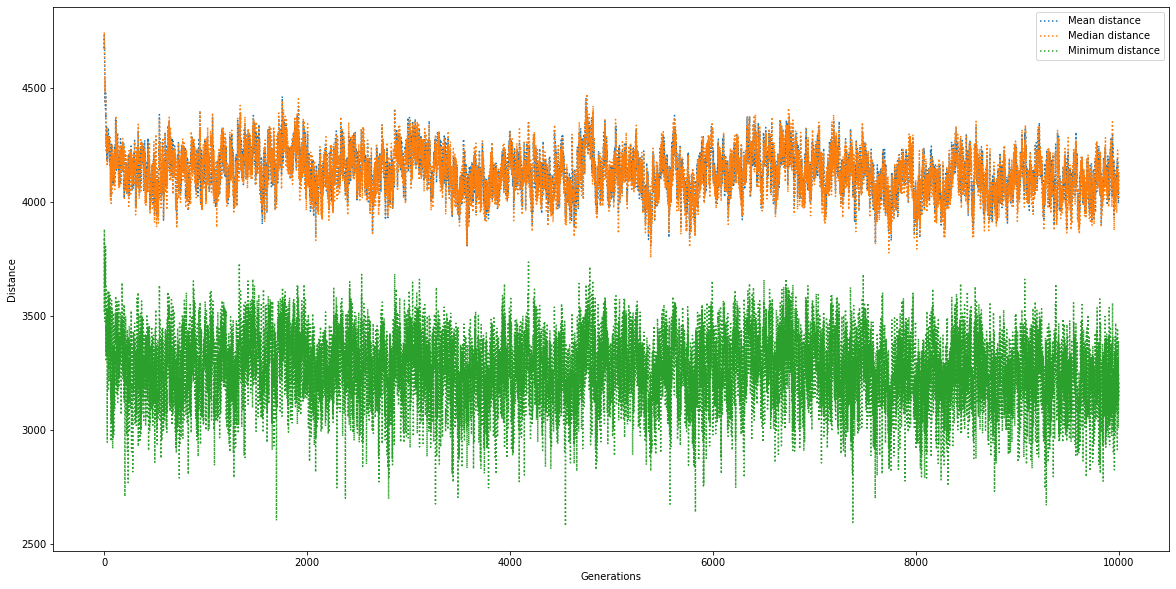

In [147]:
plt.figure(figsize=(20,10))
plt.plot(mean,':',label='Mean distance')
plt.plot(median,':',label='Median distance')
plt.plot(minimum,':',label='Minimum distance')
plt.xlabel('Generations')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [152]:
crossover_pop[0]

[6,
 22,
 21,
 15,
 27,
 7,
 19,
 9,
 13,
 17,
 23,
 28,
 24,
 0,
 4,
 25,
 2,
 1,
 26,
 3,
 18,
 8,
 20,
 16,
 5,
 11,
 12,
 10,
 14]

In [153]:
distance_travelled(crossover_pop[0],dist_matrix)

3478.0

In [154]:
k=np.array([1,28,6,12,9,26,3,29,5,21,2,20,10,4,15,18,14,17,22,11,19,25,7,23,8,27,16,13,24])-1
k=k.tolist()

In [155]:
distance_travelled(k,dist_matrix)

4660.0